In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.shape

(4466, 16)

In [5]:
df.head()

,jobma_catcher_id,is_premium,subscription_status,company_size,total_sub,subscription_type,plan_type,is_unlimited,subscription_amount_in_dollars,number_of_subscriptions,number_of_invitations,job_posted,number_of_kits,number_of_recorded_interviews,number_of_live_interviews,days_since_last_login
0,2656,0.0,1,1-25,1,0.0,0.0,1.0,175.994368,1.0,4.0,1.0,2.0,1.0,NaN,376.0
1,2935,0.0,2,26-100,0,0.0,1.0,0.0,0.623020,1.0,NaN,NaN,NaN,NaN,NaN,438.0
2,2937,0.0,2,101-500,0,0.0,1.0,0.0,1.384489,1.0,NaN,NaN,NaN,NaN,NaN,438.0
3,2938,0.0,1,26-100,0,0.0,1.0,0.0,375.008213,3.0,NaN,1.0,NaN,NaN,NaN,438.0
4,2939,0.0,2,26-100,0,0.0,1.0,0.0,138.448903,1.0,NaN,1.0,NaN,NaN,NaN,1793.0


In [6]:
df.isnull().sum()

jobma_catcher_id                     0
is_premium                           1
subscription_status                  0
company_size                         3
total_sub                            0
subscription_type                    5
plan_type                           11
is_unlimited                        86
subscription_amount_in_dollars       4
number_of_subscriptions              4
number_of_invitations             3639
job_posted                        3584
number_of_kits                    3449
number_of_recorded_interviews     3836
number_of_live_interviews         4437
days_since_last_login                2
dtype: int64

In [7]:
df.drop('subscription_type', axis=1, inplace=True)

# Specific Methods

In [9]:
def fill_mean(df, col):
    count = df[col].mean()
    df[col].fillna(count, inplace=True)

# is_premium

In [11]:
df['is_premium'].unique()

array([ 0.,  1., nan])

In [12]:
df['is_premium'].fillna(1.0, inplace=True)

In [13]:
df['is_premium'] = df['is_premium'].astype(int)

In [14]:
df['is_premium'].unique()

array([0, 1])

# company_size

In [16]:
df['company_size'].unique()

array(['1-25', '26-100', '101-500', '500-1000', nan, 'More than 1000'],
      dtype=object)

In [17]:
mode_value = df['company_size'].mode()[0]
df['company_size'].fillna(mode_value, inplace=True)

# plan_type

In [19]:
df['plan_type'].unique()

array([ 0.,  1., nan])

In [20]:
df['plan_type'].fillna(1.0, inplace=True)

In [21]:
df['plan_type'] = df['plan_type'].astype(int)

In [22]:
df['plan_type'].unique()

array([0, 1])

# is_unlimited

In [24]:
df['is_unlimited'].unique()

array([ 1.,  0., nan])

In [25]:
df['is_unlimited'].fillna(1.0, inplace=True)

In [26]:
df['is_unlimited'] = df['is_unlimited'].astype(int)

In [27]:
df['is_unlimited'].unique()

array([1, 0])

# subscription_amount

In [29]:
df['subscription_amount_in_dollars'].isnull().sum()

4

In [30]:
subscription_value = df['subscription_amount_in_dollars'].mean()

In [31]:
df['subscription_amount_in_dollars'].fillna(subscription_value, inplace=True)

In [32]:
df['subscription_amount_in_dollars'].dtype

dtype('float64')

In [33]:
df['subscription_amount_in_dollars'].isnull().sum()

0

# number_of_subscriptions

In [35]:
df['number_of_subscriptions'].unique()

array([  1.,   3.,   2.,  25.,   4.,   6.,   5.,  33.,  12.,   7.,   9.,
        22.,  23.,  16.,   8.,  14.,  17.,  10.,  11.,  18.,  19.,  47.,
        26.,  21.,  13.,  nan,  24., 116.,  29.,  15.,  28.,  20.,  27.,
        46.,  58.])

In [36]:
''' To fill missing values in column with mean '''

fill_mean(df, 'number_of_subscriptions')

In [37]:
df['number_of_subscriptions'] = df['number_of_subscriptions'].astype(int)

In [38]:
df['number_of_subscriptions'].unique()

array([  1,   3,   2,  25,   4,   6,   5,  33,  12,   7,   9,  22,  23,
        16,   8,  14,  17,  10,  11,  18,  19,  47,  26,  21,  13,  24,
       116,  29,  15,  28,  20,  27,  46,  58])

# number_of_invitations

In [40]:
df['number_of_invitations'].unique()

array([4.0000e+00,        nan, 4.8100e+02, 2.8000e+01, 1.0000e+00,
       5.0000e+00, 1.5000e+01, 2.0000e+00, 1.8000e+01, 3.0000e+00,
       1.7800e+02, 6.0000e+00, 5.3000e+01, 4.8500e+02, 1.6000e+01,
       1.9600e+02, 4.9000e+01, 5.1000e+01, 2.9200e+02, 1.0000e+01,
       1.4000e+01, 9.8000e+01, 7.6100e+02, 3.4300e+02, 1.0200e+02,
       2.6100e+02, 3.9000e+01, 2.1000e+01, 1.2000e+01, 1.1000e+01,
       5.2000e+01, 9.0000e+00, 1.9000e+01, 5.1900e+02, 7.0000e+00,
       3.7000e+01, 6.9000e+01, 1.1000e+02, 7.4000e+01, 8.0000e+00,
       3.5000e+01, 5.9000e+01, 2.6700e+02, 8.4000e+01, 7.3400e+02,
       1.3000e+01, 7.8000e+01, 2.3000e+02, 6.1400e+02, 8.3400e+02,
       2.2000e+01, 2.0000e+02, 9.1000e+01, 7.5700e+02, 3.8000e+01,
       1.7000e+01, 1.3470e+03, 7.2300e+02, 2.3000e+01, 1.3900e+02,
       2.7000e+01, 1.1720e+03, 5.0000e+01, 4.8700e+02, 2.9600e+02,
       9.8300e+02, 2.5000e+01, 3.0000e+01, 4.9900e+02, 2.1700e+02,
       3.1500e+02, 9.6000e+01, 4.5000e+01, 2.9500e+02, 3.2400e

In [41]:
''' To fill missing values in column with mean '''

fill_mean(df, 'number_of_invitations')

In [42]:
df['number_of_invitations'] = df['number_of_invitations'].astype(int)

In [43]:
df['number_of_invitations'].unique()

array([    4,    99,   481,    28,     1,     5,    15,     2,    18,
           3,   178,     6,    53,   485,    16,   196,    49,    51,
         292,    10,    14,    98,   761,   343,   102,   261,    39,
          21,    12,    11,    52,     9,    19,   519,     7,    37,
          69,   110,    74,     8,    35,    59,   267,    84,   734,
          13,    78,   230,   614,   834,    22,   200,    91,   757,
          38,    17,  1347,   723,    23,   139,    27,  1172,    50,
         487,   296,   983,    25,    30,   499,   217,   315,    96,
          45,   295,   324,    33,   780,  1204,    67,   389,    20,
         444,    24,    75,   337,   144,    36,    43,    60,   184,
          26,   392,    57,    40,    83,    66,   518,   436,    55,
        1465,   106,    56,    54,    29,   162,    32,    44,    62,
         312,   390,    70,    31,    61,   241,   246,   131, 50046,
          47,   572,    73,    81,   422,   240,   137,   183,    46])

# job_posted

In [45]:
df['job_posted'].unique()

array([  1.,  nan,   2.,  36.,   5.,   3.,   6.,  92.,   4.,  37.,  24.,
        13.,   7.,  11.,  14.,  12.,   9.,  89.,  10.,  21.,  26.,  17.,
       156.,  41.,  16., 189.,  40.,  33.,  51.,  45.,   8.,  69.,  75.,
        28.,  19., 117.,  20., 181.,  18., 179.,  34.,  22.,  44.,  15.,
        42.,  23.,  27.,  35.,  30.,  53.,  50.])

In [46]:
''' To fill missing values in column with mean '''

fill_mean(df, 'job_posted')

In [47]:
df['job_posted'] = df['job_posted'].astype(int)

In [48]:
df['job_posted'].unique()

array([  1,   5,   2,  36,   3,   6,  92,   4,  37,  24,  13,   7,  11,
        14,  12,   9,  89,  10,  21,  26,  17, 156,  41,  16, 189,  40,
        33,  51,  45,   8,  69,  75,  28,  19, 117,  20, 181,  18, 179,
        34,  22,  44,  15,  42,  23,  27,  35,  30,  53,  50])

In [49]:
df['job_posted'].isnull().sum()

0

# number_of_kits

In [51]:
df['number_of_kits'].unique()

array([  2.,  nan,   8.,   4.,   1.,   3.,  27.,  17.,  71.,   5.,   6.,
        31.,  13., 124.,   7.,  41.,  80.,  15.,  75.,   9., 197., 151.,
        11.,  67.,  82.,  42.,  23.,  19.,  36.,  90.,  40.,  22.,  29.,
        25.,  10.,  18.,  14.,  16.,  99.,  66.,  48., 292., 114., 116.,
        12.,  20.,  39.,  60., 103.,  26.,  57.,  24., 162.,  32.,  28.,
        64.,  68.])

In [52]:
df['number_of_kits'].dtype

dtype('float64')

In [53]:
df['number_of_kits'].fillna(0.0, inplace=True)

In [54]:
df['number_of_kits'] = df['number_of_kits'].astype(int)

In [55]:
df['number_of_kits'].dtype

dtype('int32')

In [56]:
df['number_of_kits'].unique()

array([  2,   0,   8,   4,   1,   3,  27,  17,  71,   5,   6,  31,  13,
       124,   7,  41,  80,  15,  75,   9, 197, 151,  11,  67,  82,  42,
        23,  19,  36,  90,  40,  22,  29,  25,  10,  18,  14,  16,  99,
        66,  48, 292, 114, 116,  12,  20,  39,  60, 103,  26,  57,  24,
       162,  32,  28,  64,  68])

# number_of_recorded_interviews    

In [58]:
df['number_of_recorded_interviews'].unique()

array([  1.,  nan,  40.,   2.,   3., 215.,   9.,   4.,  46.,  10.,  13.,
        11.,   5.,  14., 203.,   8.,   6.,  38.,   7.,  32.,  37., 154.,
        19., 396.,  31., 151., 375., 384.,  12., 156.,  39., 328.,  22.,
       449., 470.,  15.,  47., 481.,  27.,  26., 183.,  92., 468.,  16.,
       298., 124., 178.,  54.,  28., 102.,  33.,  29., 635., 549.,  18.,
       111.,  25., 348.,  73., 201., 112.,  34.,  21., 162.,  43.,  74.,
       181., 135., 441.,  59.,  85.,  24., 188., 206.,  51.,  17.,  44.,
        57.,  35.,  45.,  20., 270.,  48., 255.,  41., 136.,  68.,  77.,
       103.])

In [59]:
df['number_of_recorded_interviews'].fillna(0.0, inplace=True)

In [60]:
df['number_of_recorded_interviews'] = df['number_of_recorded_interviews'].astype(int)

In [61]:
df['number_of_recorded_interviews'].unique()

array([  1,   0,  40,   2,   3, 215,   9,   4,  46,  10,  13,  11,   5,
        14, 203,   8,   6,  38,   7,  32,  37, 154,  19, 396,  31, 151,
       375, 384,  12, 156,  39, 328,  22, 449, 470,  15,  47, 481,  27,
        26, 183,  92, 468,  16, 298, 124, 178,  54,  28, 102,  33,  29,
       635, 549,  18, 111,  25, 348,  73, 201, 112,  34,  21, 162,  43,
        74, 181, 135, 441,  59,  85,  24, 188, 206,  51,  17,  44,  57,
        35,  45,  20, 270,  48, 255,  41, 136,  68,  77, 103])

# number_of_live_interviews

In [63]:
df['number_of_live_interviews'].unique()

array([ nan,   4.,   1.,   8.,  18.,   2.,  13., 225.,  29.,  26.,   3.,
         5.,   6.])

In [64]:
df['number_of_live_interviews'].fillna(0.0, inplace=True)

In [65]:
df['number_of_live_interviews'] = df['number_of_live_interviews'].astype(int)

In [66]:
df['number_of_live_interviews'].unique()

array([  0,   4,   1,   8,  18,   2,  13, 225,  29,  26,   3,   5,   6])

# days_since_last_login

In [68]:
df['days_since_last_login'].value_counts()

days_since_last_login
1086.0    60
1070.0    41
1750.0    41
1071.0    38
1672.0    36
          ..
897.0      1
971.0      1
964.0      1
1725.0     1
336.0      1
Name: count, Length: 717, dtype: int64

In [69]:
''' To fill missing values in column with mean '''

fill_mean(df, 'days_since_last_login')

In [70]:
df['days_since_last_login'] = df['days_since_last_login'].astype(int)

In [71]:
df['days_since_last_login'].unique()

array([ 376,  438, 1793, 1792, 1791, 1790,  463, 1789, 1786, 1350, 1737,
       1785, 1783, 1784, 1777, 1781, 1782, 1761, 1771, 1780, 1779, 1778,
       1776, 1775, 1772, 1770, 1769,  601, 1768, 1765, 1763, 1756, 1762,
       1751, 1757, 1755, 1706, 1754, 1750, 1451, 1747, 1749, 1744, 1743,
       1741, 1740, 1736, 1735, 1733, 1726, 1730, 1728, 1724, 1725, 1698,
       1709, 1708, 1707, 1705, 1688, 1702, 1699, 1701, 1700, 1695, 1610,
       1693, 1694, 1692, 1691, 1690, 1687, 1681, 1684, 1680, 1145, 1679,
       1658, 1673, 1678, 1649, 1677, 1664, 1665, 1674, 1672, 1671, 1667,
       1583, 1590, 1552, 1642, 1666, 1663, 1561, 1660, 1659, 1657, 1652,
       1656, 1377, 1653, 1650, 1651, 1646, 1502, 1645, 1568, 1644, 1580,
       1643, 1639, 1632, 1623, 1631, 1630, 1573, 1629, 1628, 1622, 1618,
       1617, 1600, 1609, 1601, 1607, 1575, 1597, 1596, 1595, 1593, 1589,
       1588, 1584, 1559, 1582, 1576, 1569, 1574, 1572,  435, 1553, 1567,
       1546, 1565, 1566,  434, 1562, 1558, 1463, 15

In [72]:
df.isnull().sum()

jobma_catcher_id                  0
is_premium                        0
subscription_status               0
company_size                      0
total_sub                         0
plan_type                         0
is_unlimited                      0
subscription_amount_in_dollars    0
number_of_subscriptions           0
number_of_invitations             0
job_posted                        0
number_of_kits                    0
number_of_recorded_interviews     0
number_of_live_interviews         0
days_since_last_login             0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   jobma_catcher_id                4466 non-null   int64  
 1   is_premium                      4466 non-null   int32  
 2   subscription_status             4466 non-null   int64  
 3   company_size                    4466 non-null   object 
 4   total_sub                       4466 non-null   int64  
 5   plan_type                       4466 non-null   int32  
 6   is_unlimited                    4466 non-null   int32  
 7   subscription_amount_in_dollars  4466 non-null   float64
 8   number_of_subscriptions         4466 non-null   int32  
 9   number_of_invitations           4466 non-null   int32  
 10  job_posted                      4466 non-null   int32  
 11  number_of_kits                  4466 non-null   int32  
 12  number_of_recorded_interviews   44

# Checking for Outliers

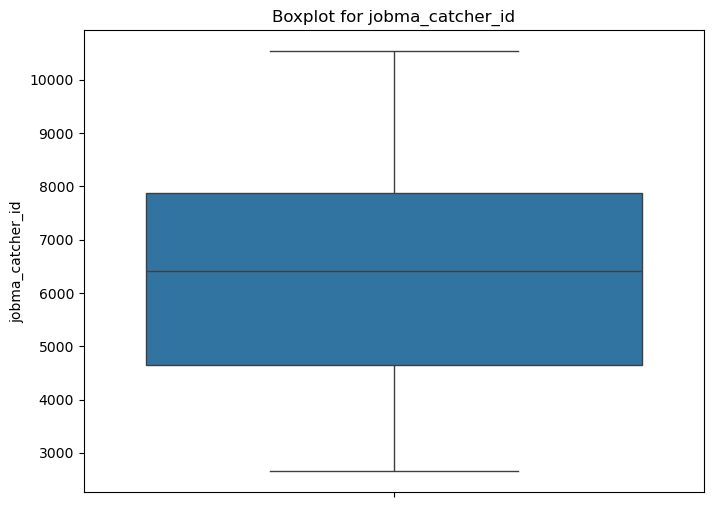

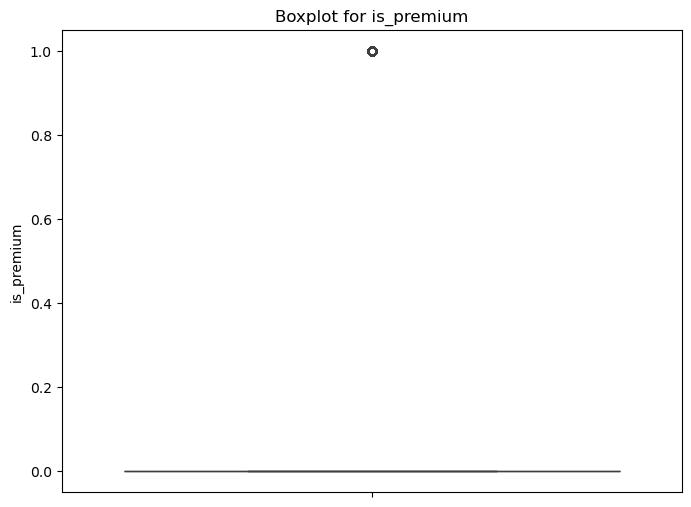

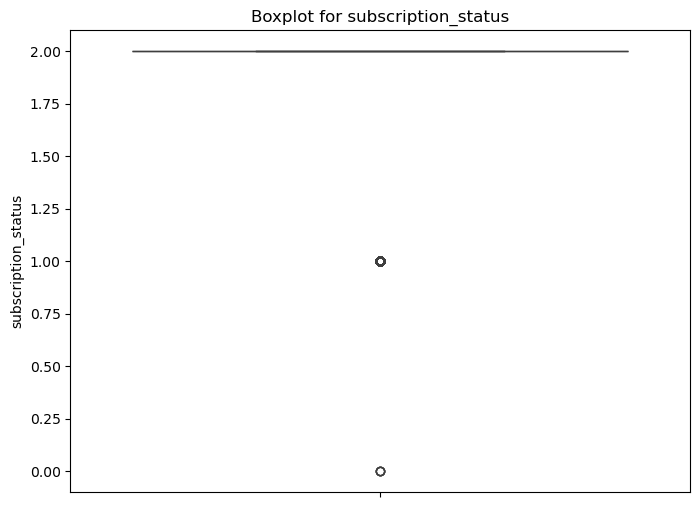

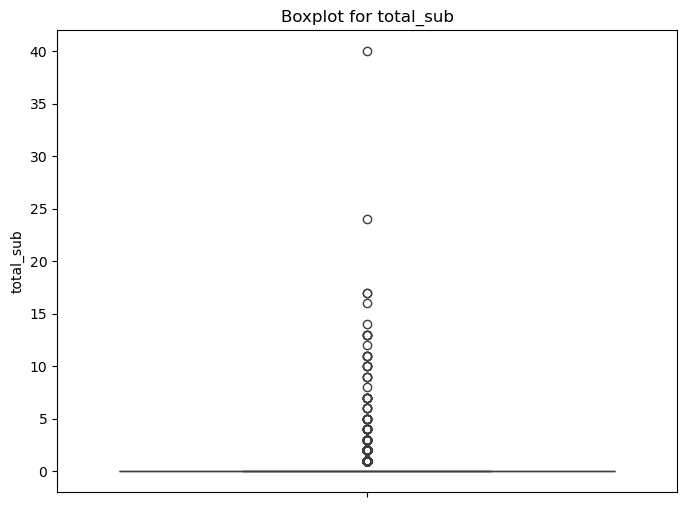

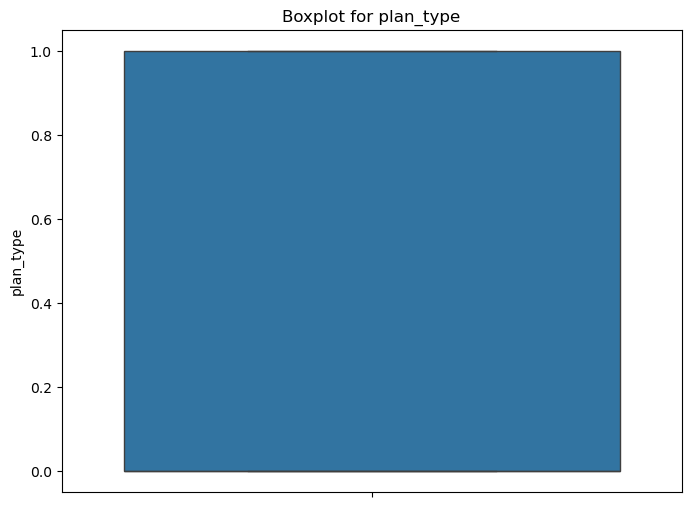

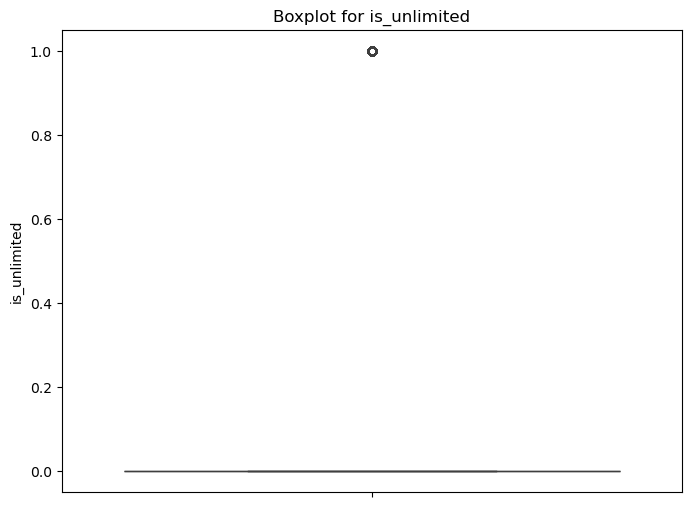

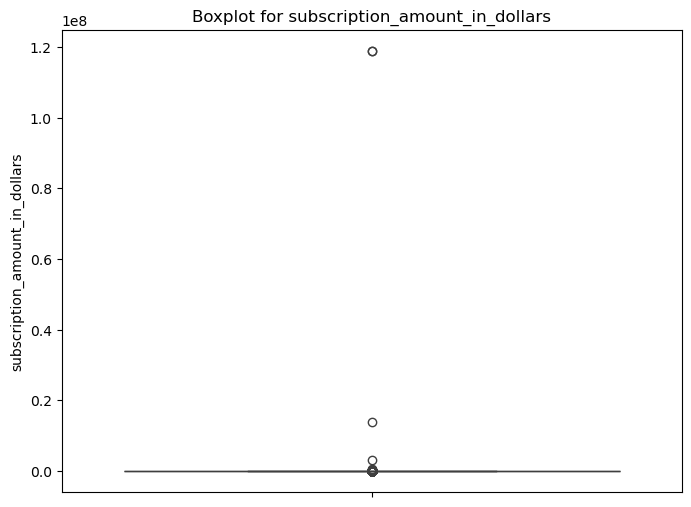

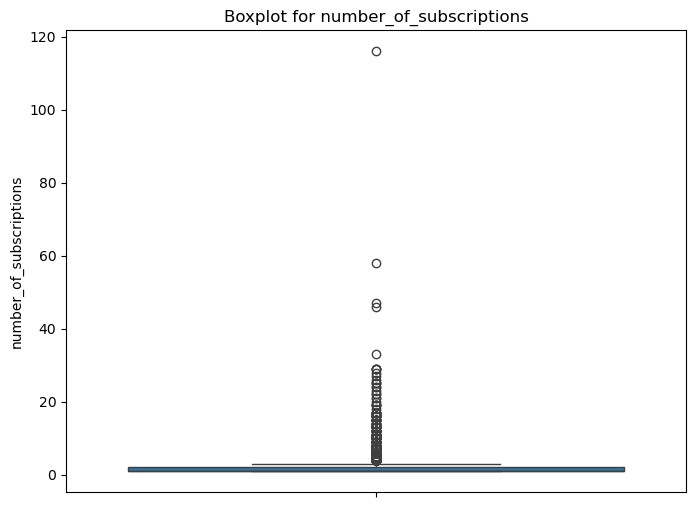

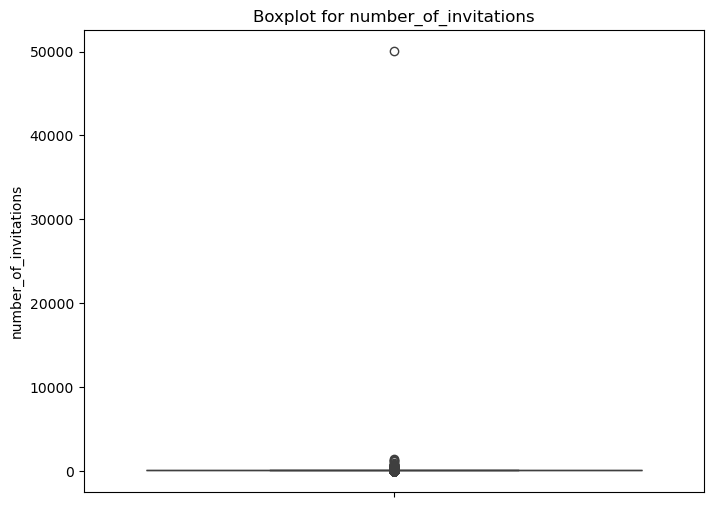

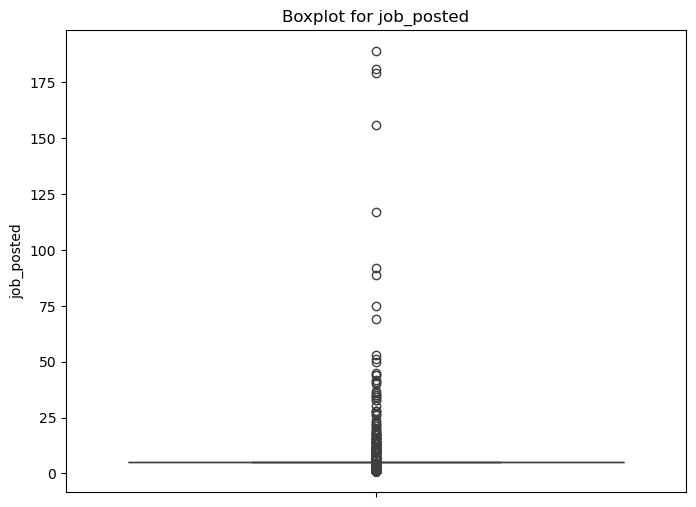

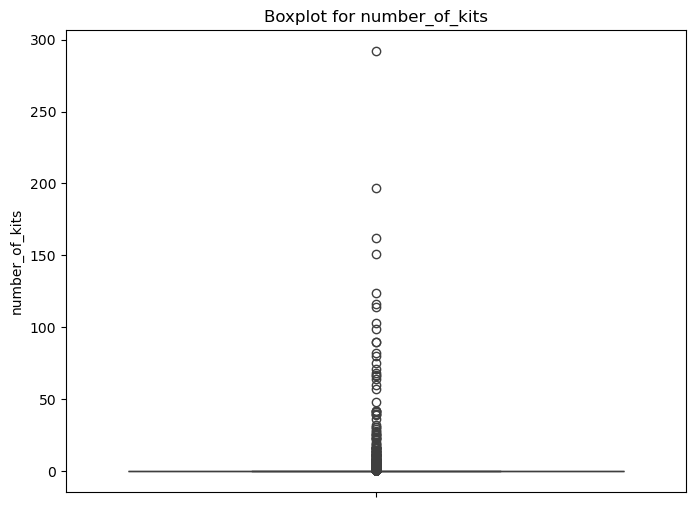

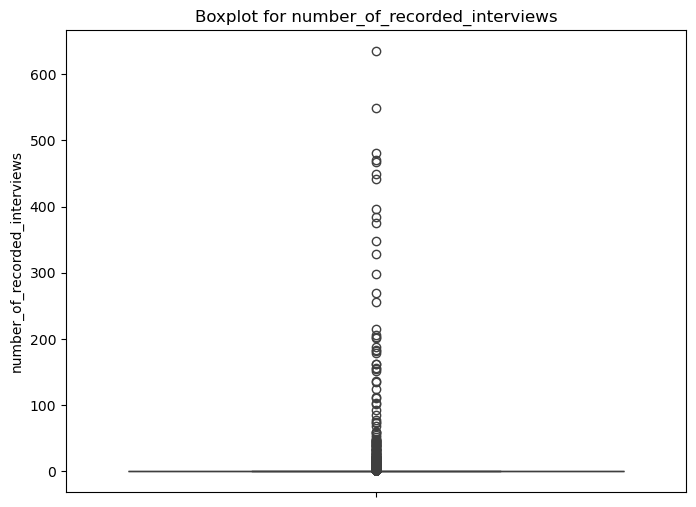

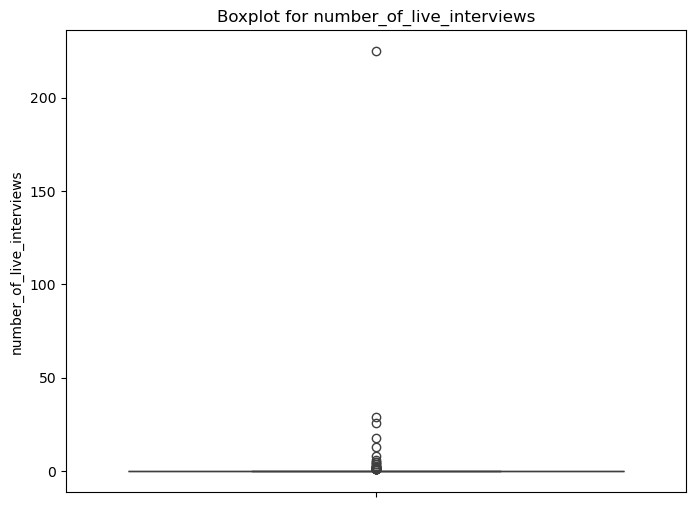

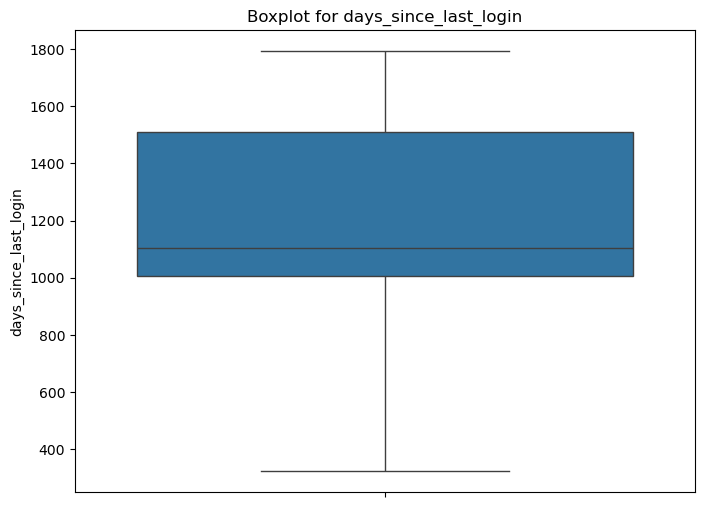

In [75]:
''' Checking for Outliers '''

for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# HeatMap

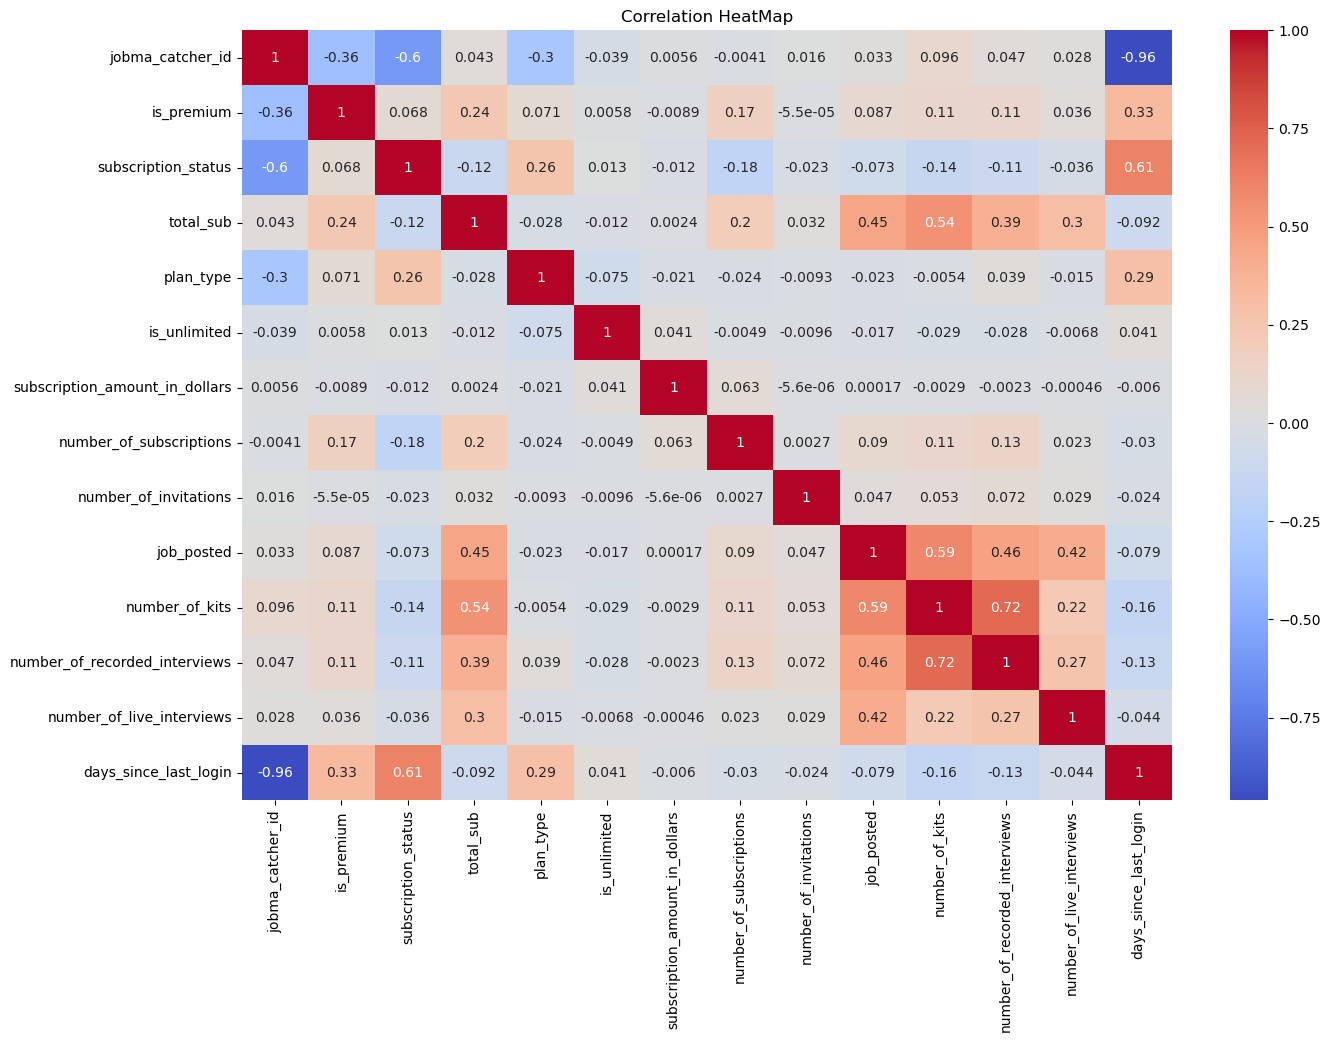

In [77]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

# Exporting

In [80]:
df.to_csv("processed_data.csv", index=False)